In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_pickle('drive/MyDrive/DSA4266/combined_df.pkl')
attack_df = df[df['Attack_label'] != 0]
attack_df = df[df['Attack_type'] != 4]


In [ ]:
y = pd.read_pickle('drive/MyDrive/DSA4266/final_df.pkl')['Attack_type']


In [ ]:
df = pd.read_pickle('drive/MyDrive/DSA4266/final_df.pkl')

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

y = df['Attack_type']

y_original = label_encoder.inverse_transform(y)

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
X = attack_df.drop(['Attack_type'], axis=1)
y = attack_df['Attack_type']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
balanced = pd.read_pickle('drive/MyDrive/DSA4266/train_smote.pkl')

In [ ]:
X_train_smote = balanced['X_train_smote']
y_train_smote = balanced['y_train_smote']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=10)

# Train the model on the SMOTE-balanced data
knn_model.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_val, y_val, test_size=0.1, random_state=42, stratify=y_val)

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
import numpy as np

# Predict on the validation set
y_pred = knn_model.predict(X_val)

# Calculate AUC-ROC
try:
  y_pred_proba = knn_model.predict_proba(X_val)
  auc_roc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')
except:
  auc_roc = 'Not applicable for this model'

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)

# Calculate F1 score
f1 = f1_score(y_val, y_pred, average='weighted')

print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

AUC-ROC: 0.9606933688870468
Accuracy: 0.8194638759863451
F1 Score: 0.8243076646224361


In [ ]:
len(y_val)

17869

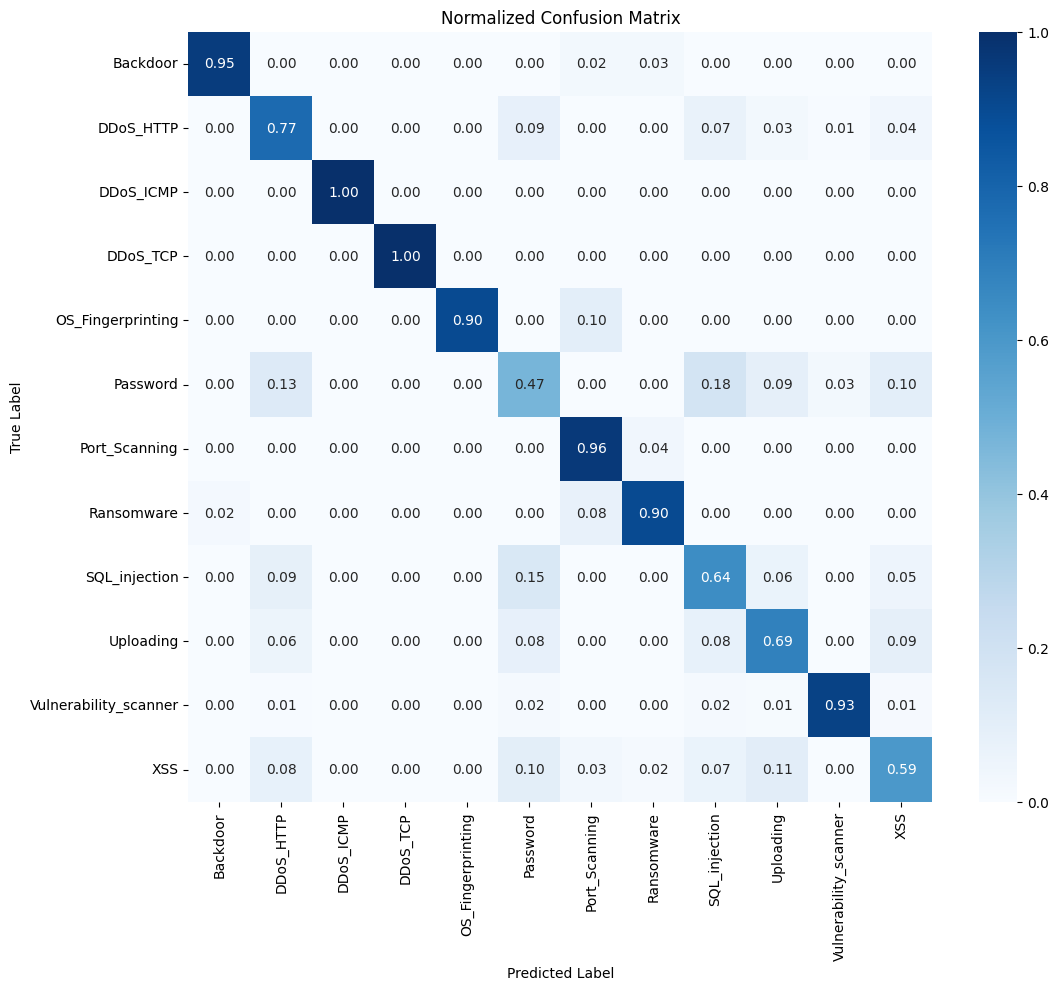

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_classes = y_pred

# Create the confusion matrix
cm = confusion_matrix(y_val, y_pred_classes)

# Get class names back using the label encoder
class_names = label_encoder.inverse_transform(np.unique(y_val))

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix")
plt.show()

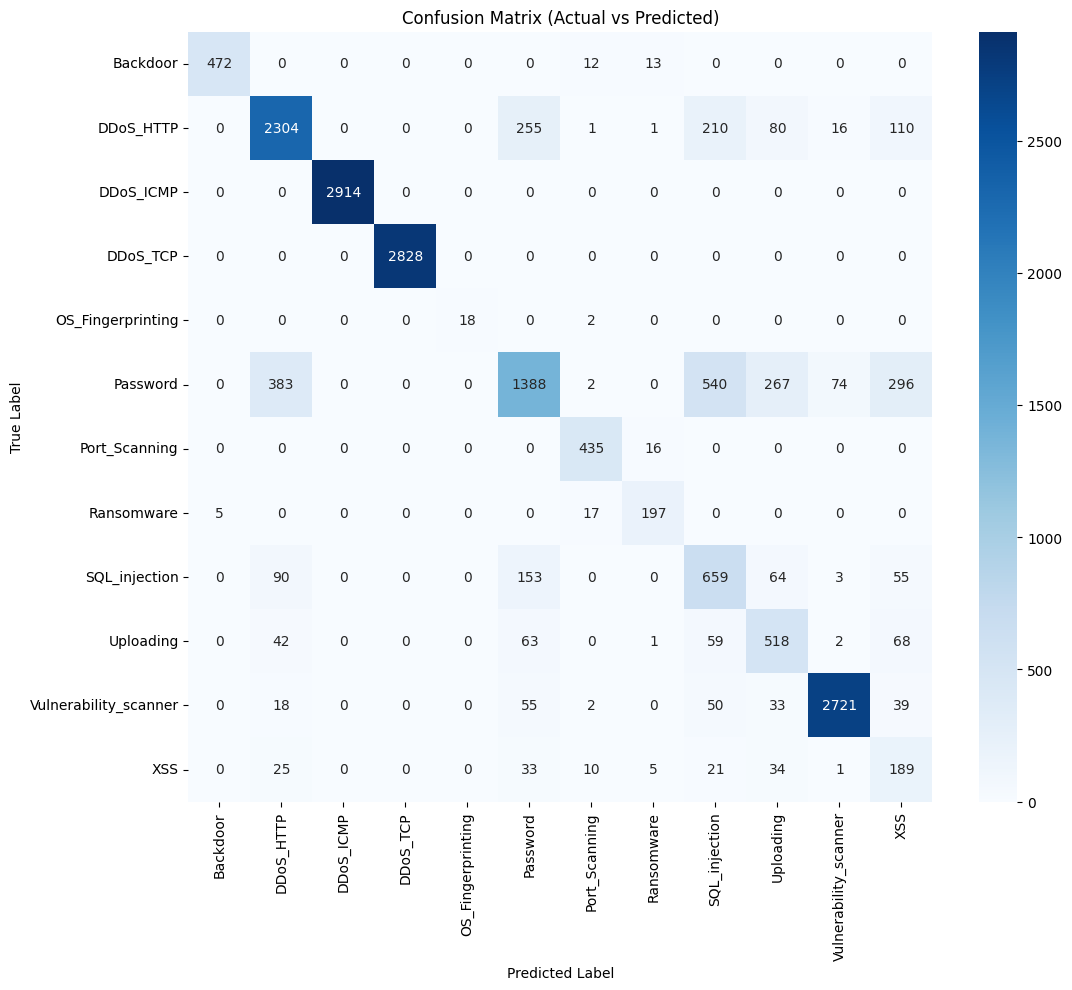

In [ ]:
cm = confusion_matrix(y_val, y_pred_classes)

# Get class names back using the label encoder (assuming you have it defined)
class_names = label_encoder.inverse_transform(np.unique(y_val))

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Actual vs Predicted)")
plt.show()